In [1]:
import numpy as np

In [2]:
from TestData import TestData

test_data_gen = TestData()

In [3]:
test_images = test_data_gen.get_test_data()

In [4]:
from utils import preprocess_test_images, merge_predictions

In [5]:
preprocessed = preprocess_test_images(test_images)

In [6]:
from keras.models import load_model

model = load_model("model-iou.h5")

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/opt/conda/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
predictions = model.predict(preprocessed)

In [8]:
merged_preds = merge_predictions(predictions.reshape(-1, 400, 400,))

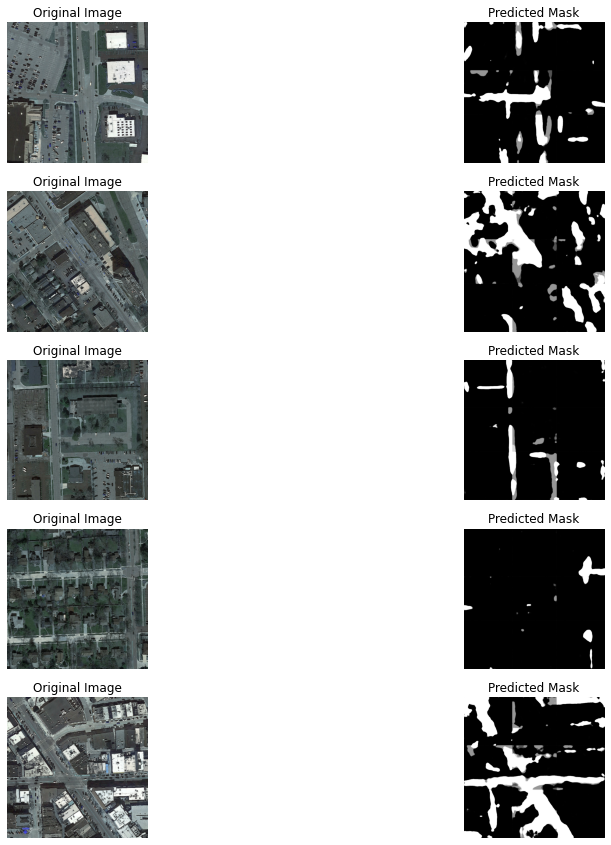

In [10]:
from visualization import display_predictions
import matplotlib.pyplot as plt

plt.figure(figsize= (15, 15))
display_predictions(test_images, merged_preds)

In [11]:
from Labelizer import Labelizer

labelizer = Labelizer()
submission = labelizer.make_submission(merged_preds, test_data_gen.numbers)

In [12]:
import pandas as pd

submission_df = pd.DataFrame({'id': submission[1], 'prediction': submission[0]})

In [13]:
submission_df.head()

,id,prediction
0,130_0_0,0
1,130_0_16,0
2,130_0_32,0
3,130_0_48,0
4,130_0_64,0


In [14]:
submission_name = 'submission.csv'

submission_df.to_csv(submission_name, index= False)

In [15]:
new = pd.DataFrame(pd.read_csv('submission.csv'))
old = pd.DataFrame(pd.read_csv('submission2.csv'))

In [16]:
old_preds = old['prediction']
new_preds = new['prediction']

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(old_preds, new_preds)

0.8742559085283197